In [2]:
from PIL import Image
from ultralytics import YOLO, utils
import matplotlib.pyplot as plt
import numpy as np

In [4]:
model = YOLO(r"yolov8_n_24aug2023.pt")

In [36]:
im1 = Image.open(r"..\test-data\book_shelf.jpg")

In [6]:
results = model.predict(source=im1, save=True, show_labels=False, show_conf=False, boxes=False, device='cpu')


0: 480x640 32 book-spines, 152.6ms
Speed: 3.0ms preprocess, 152.6ms inference, 37.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to e:\Code\shelfscan\runs\segment\predict2


In [7]:
results = model.predict(source=im1, save=True, show_labels=False, show_conf=False, boxes=False)


0: 480x640 32 book-spines, 128.2ms
Speed: 4.0ms preprocess, 128.2ms inference, 31.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to e:\Code\shelfscan\runs\segment\predict2


In [8]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.engine.results.Masks object
 names: {0: 'book-spine'}
 orig_img: array([[[ 46,  67,  98],
         [ 45,  66,  97],
         [ 44,  65,  96],
         ...,
         [ 85, 125, 167],
         [ 91, 131, 173],
         [ 98, 138, 180]],
 
        [[ 46,  67,  98],
         [ 45,  66,  97],
         [ 44,  65,  96],
         ...,
         [ 86, 126, 168],
         [ 91, 131, 173],
         [ 97, 137, 179]],
 
        [[ 44,  65,  96],
         [ 44,  65,  96],
         [ 43,  64,  95],
         ...,
         [ 87, 127, 169],
         [ 91, 131, 173],
         [ 95, 135, 177]],
 
        ...,
 
        [[ 94,  79,  33],
         [ 93,  78,  32],
         [ 89,  76,  30],
         ...,
         [146, 172, 189],
         [146, 172, 189],
         [146, 172, 189]],
 
        [[ 94,  78,  35],
         [ 93,  77,  34],
    

In [9]:
len(results[0].masks.xy)

32

In [10]:
mask_num = 2

In [11]:
results[0].masks.xy[mask_num] # X column and Y column
# appears to be the coordinates of the exterior of the mask
# need to find pixels behind the polygon of the mask

array([[     1896.3,      1058.4],
       [       1890,      1064.7],
       [       1890,        1953],
       [     1902.6,      1965.6],
       [     2022.3,      1965.6],
       [     2028.6,      1959.3],
       [     2034.9,      1959.3],
       [     2034.9,        1953],
       [     2041.2,      1946.7],
       [     2041.2,      1877.4],
       [     2047.5,      1871.1],
       [     2047.5,      1795.5],
       [     2053.8,      1789.2],
       [     2053.8,      1694.7],
       [     2060.1,      1688.4],
       [     2060.1,      1486.8],
       [     2066.4,      1480.5],
       [     2066.4,        1323],
       [     2072.7,      1316.7],
       [     2072.7,      1241.1],
       [       2079,      1234.8],
       [       2079,      1102.5],
       [     2085.3,      1096.2],
       [     2085.3,      1064.7],
       [       2079,      1058.4]], dtype=float32)

In [12]:
np.round(results[0].masks.xy[0]).astype(int)  # X column and Y column array

array([[1569, 1134],
       [1562, 1140],
       [1562, 1682],
       [1569, 1688],
       [1569, 1770],
       [1575, 1777],
       [1575, 1808],
       [1581, 1814],
       [1581, 1846],
       [1588, 1852],
       [1588, 1947],
       [1594, 1953],
       [1632, 1953],
       [1632, 1947],
       [1644, 1934],
       [1644, 1871],
       [1638, 1865],
       [1638, 1814],
       [1632, 1808],
       [1632, 1373],
       [1625, 1367],
       [1625, 1203],
       [1619, 1197],
       [1619, 1159],
       [1613, 1153],
       [1613, 1140],
       [1606, 1140],
       [1600, 1134]])

In [13]:
mask_xy = np.round(results[0].masks.xy[mask_num]).astype(int)

In [14]:
len(mask_xy)

25

In [15]:
bit_mask = np.zeros(im1.size, dtype=int)

In [16]:
im1.size

(4032, 3024)

In [17]:
bit_mask[mask_xy[:, 0], mask_xy[:, 1]] = 1

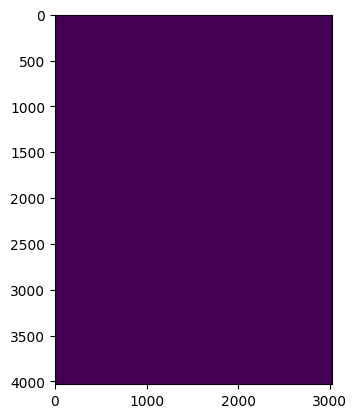

In [18]:
plt.imshow(bit_mask)

In [19]:
from shapely import Point, Polygon
import shapely.vectorized
import rasterio.features

In [20]:
mask_polygon = Polygon(mask_xy)

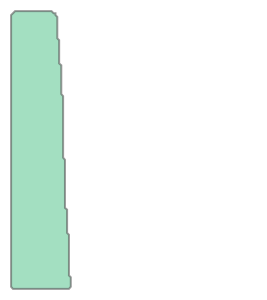

In [21]:
mask_polygon

In [22]:
list(mask_polygon.exterior.coords)

[(1896.0, 1058.0),
 (1890.0, 1065.0),
 (1890.0, 1953.0),
 (1903.0, 1966.0),
 (2022.0, 1966.0),
 (2029.0, 1959.0),
 (2035.0, 1959.0),
 (2035.0, 1953.0),
 (2041.0, 1947.0),
 (2041.0, 1877.0),
 (2047.0, 1871.0),
 (2047.0, 1795.0),
 (2054.0, 1789.0),
 (2054.0, 1695.0),
 (2060.0, 1688.0),
 (2060.0, 1487.0),
 (2066.0, 1480.0),
 (2066.0, 1323.0),
 (2073.0, 1317.0),
 (2073.0, 1241.0),
 (2079.0, 1235.0),
 (2079.0, 1102.0),
 (2085.0, 1096.0),
 (2085.0, 1065.0),
 (2079.0, 1058.0),
 (1896.0, 1058.0)]

In [23]:
im1.width

4032

In [24]:
im1.size

(4032, 3024)

In [31]:
mask_map = rasterio.features.rasterize([mask_polygon], out_shape=(im1.height, im1.width))


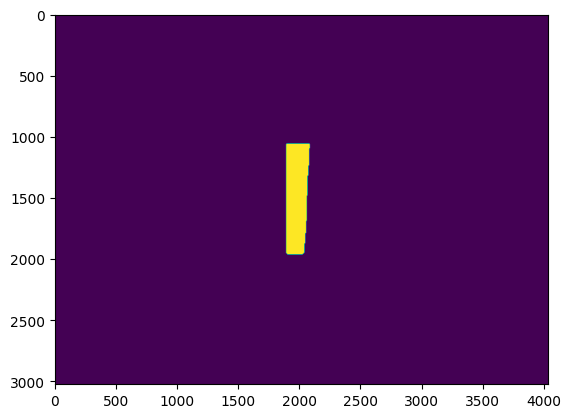

In [32]:
plt.imshow(mask_map)

In [33]:
# take mask_map and apply to input image to filter rgb image down to just the book spine
# apply thresholding technique
# apply ocr

In [37]:
im1_bw = im1.convert("L")

In [41]:
im1_bw.size

(4032, 3024)

In [42]:
masked_image = im1_bw*mask_map

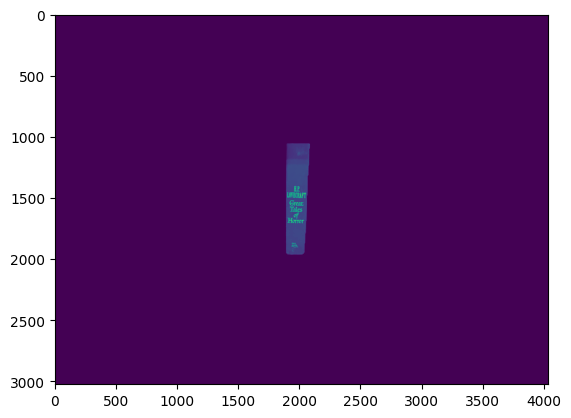

In [43]:
plt.imshow(masked_image)